<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [4]:
sat_csv_path='./sat_scores.csv'
rows = []
with open(sat_csv_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
header = rows[0]
header = ['state','rate','verbal','math']
data_list = rows[1:]
data_nums = []
for row in data_list:
    new_row = []
    for i, col in enumerate(row):
        if i == 0:
            new_row.append(col)
        else:
            new_row.append(float(col))
    data_nums.append(new_row)
sat_data = {}
for i, col in enumerate(header):
    sat_data[col] = []
    for row in data_nums:
        sat_data[col].append(row[i])

In [5]:
header

['state', 'rate', 'verbal', 'math']

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
df1 = pd.DataFrame(sat_data)

In [7]:
dfd = pd.read_csv('./sat_scores.csv')

In [8]:
df1.dtypes, dfd.dtypes

(math      float64
 rate      float64
 state      object
 verbal    float64
 dtype: object, State     object
 Rate       int64
 Verbal     int64
 Math       int64
 dtype: object)

In [9]:
dfd.shape

(52, 4)

In [10]:
dfd.head(51)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [11]:
dfd.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [12]:
#I converted the numeric entries in the dictionary to floats after I imported them. Therefore, those entries show up
# as float64 data types in the DataFrame created from the dictionary. The DataFrame read directly from the csv file
# loaded the numeric data as integers. The state column appears as an object in both DataFrames.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [13]:
# Removed the "All" summary entry at the bottom of the database.
df=dfd[:-1]
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [14]:
# Data describes each state's (plus DC) rate of participation in the SAT test, and the average Verbal and Math scores
# for each state. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [15]:
dd={}
dd['Variable']=['State','Rate','Verbal','Math']
dd['Variable Type']=['object','integer','integer','integer']
dd['_Description_']=['Postal state codes','Rate of participation in SAT test',
                     'Average score on verbal portion of SAT test',
                     'Average score on math portion of SAT test']
dddf=pd.DataFrame(dd)
dddf

,Variable,Variable Type,_Description_
0,State,object,Postal state codes
1,Rate,integer,Rate of participation in SAT test
2,Verbal,integer,Average score on verbal portion of SAT test
3,Math,integer,Average score on math portion of SAT test


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

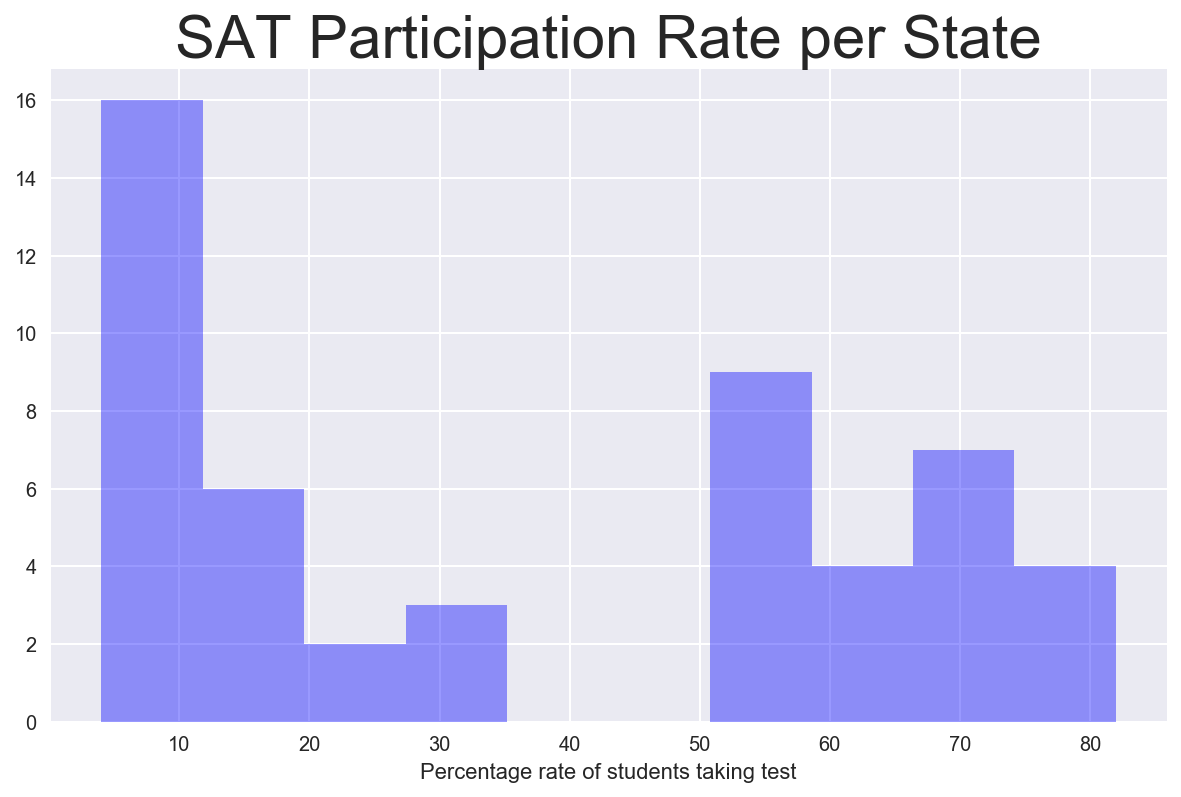

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['Rate'], bins=10, kde=False, color='b',axlabel="Percentage rate of students taking test")
sns.plt.title('SAT Participation Rate per State', fontsize=30)

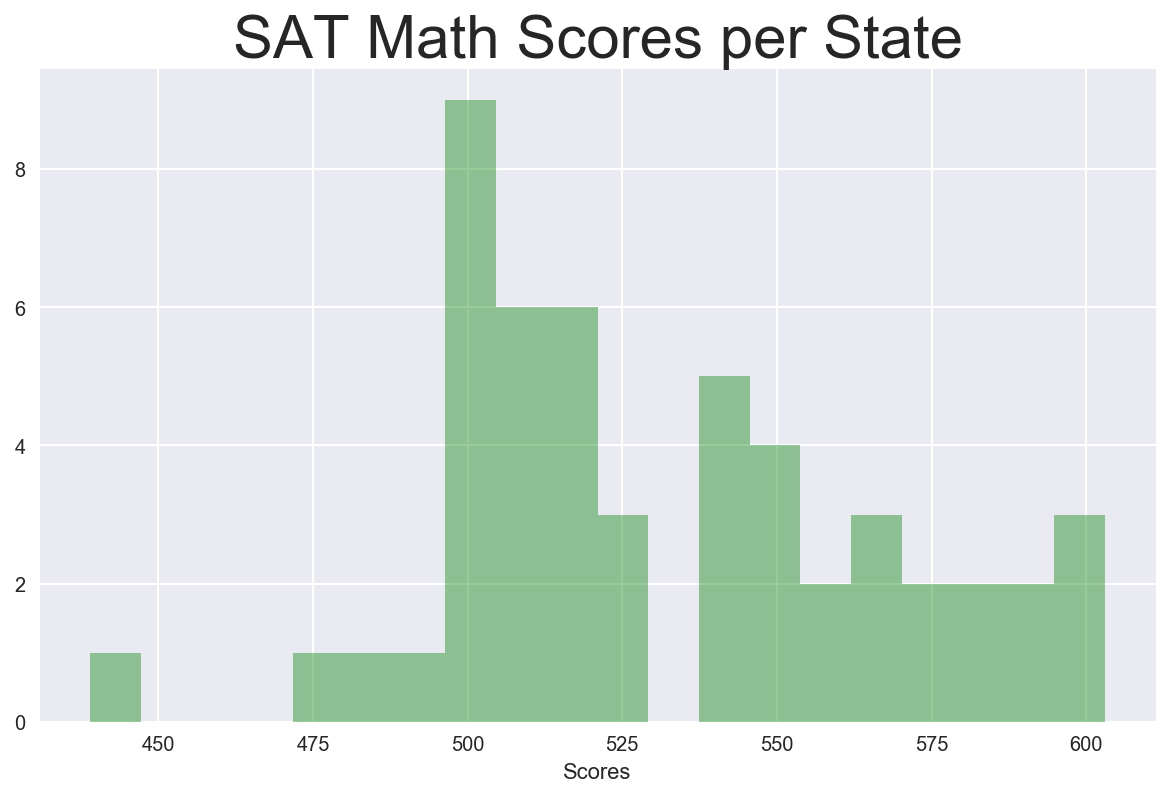

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['Math'], bins=20, kde=False, color='g',axlabel="Scores")
sns.plt.title('SAT Math Scores per State', fontsize=30)

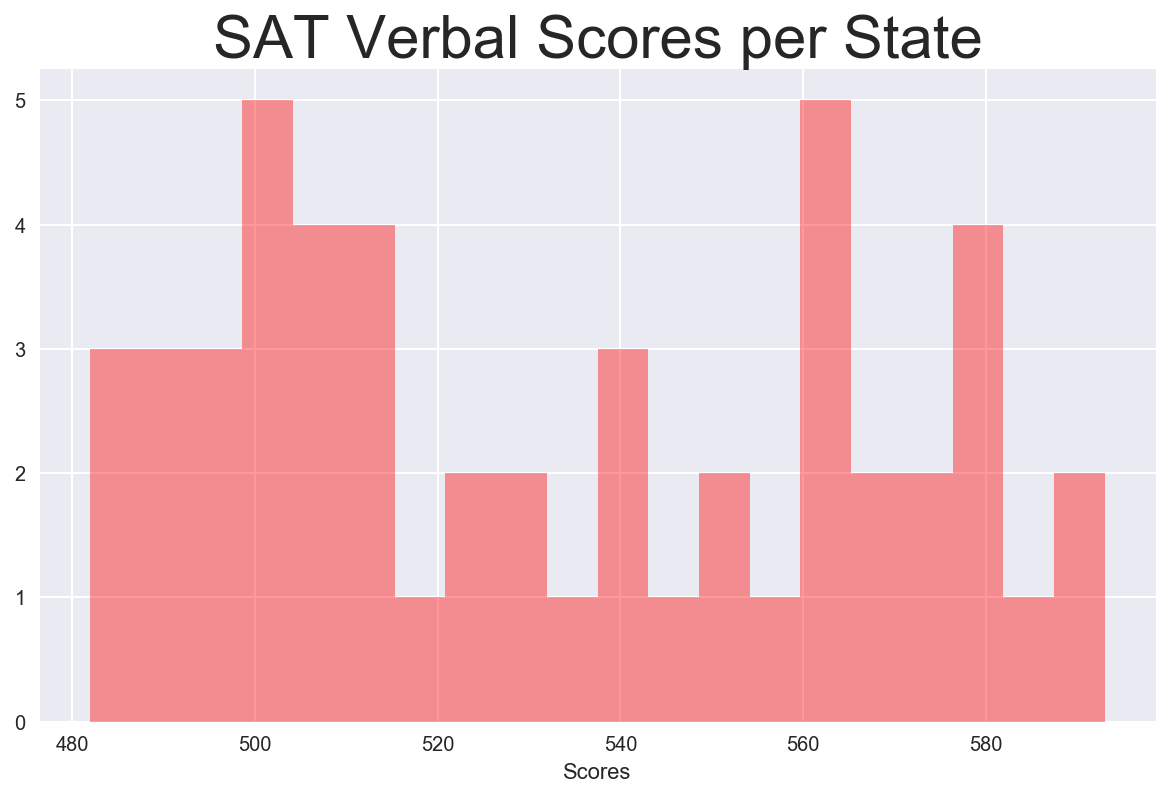

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['Verbal'], bins=20, kde=False, color='r',axlabel="Scores")
sns.plt.title('SAT Verbal Scores per State', fontsize=30)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

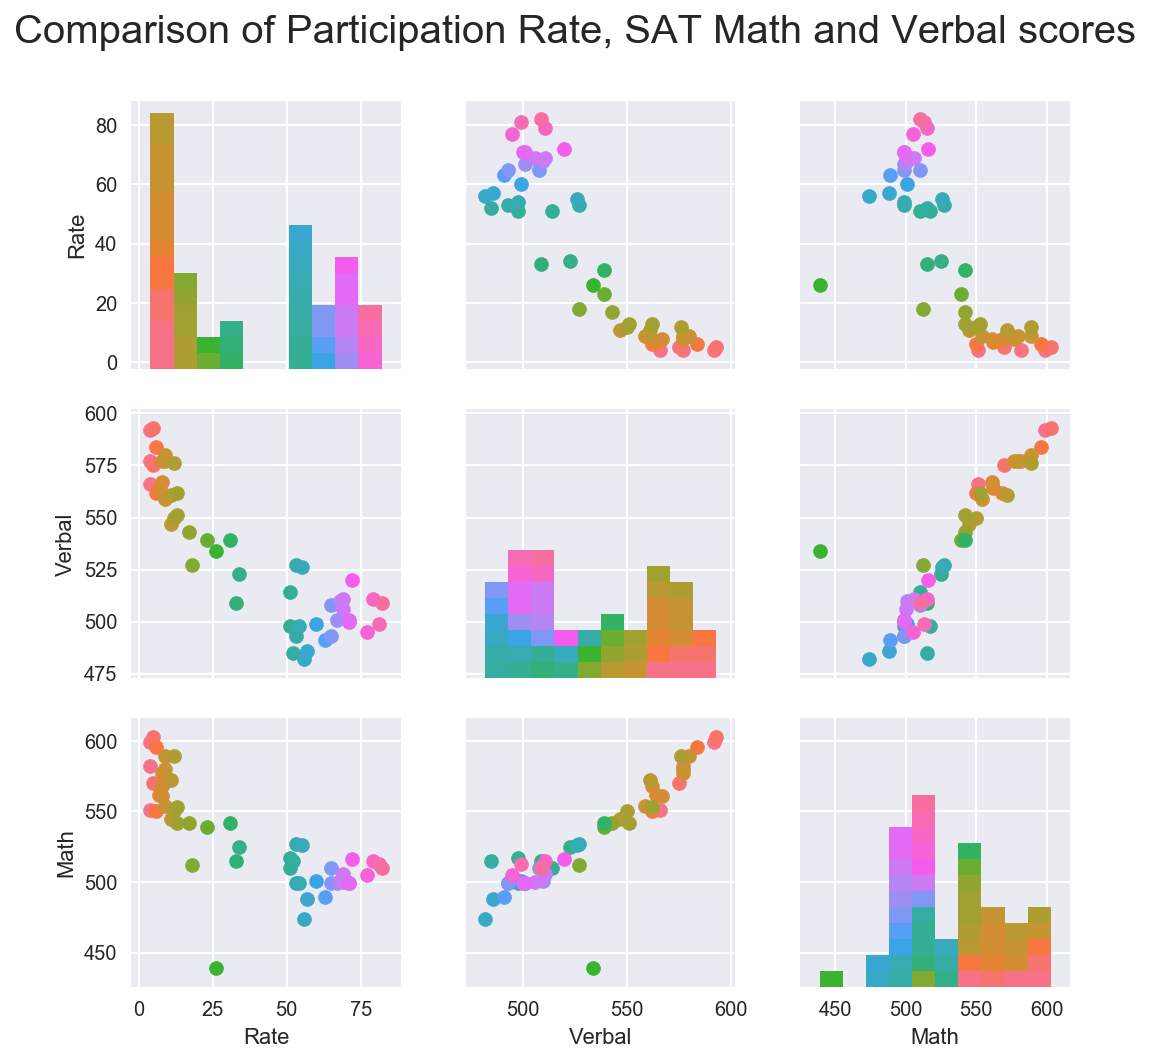

In [19]:
g_ra=df['Rate']
g_ma=df['Math']
g_ve=df['Verbal']

g = sns.PairGrid(df, hue='Rate')
g = g.map_upper(plt.scatter)
g = g.map_lower(plt.scatter)
g = g.map_diag(plt.hist)
sns.plt.suptitle('Comparison of Participation Rate, SAT Math and Verbal scores', fontsize=20)
sns.plt.subplots_adjust(top=.9)

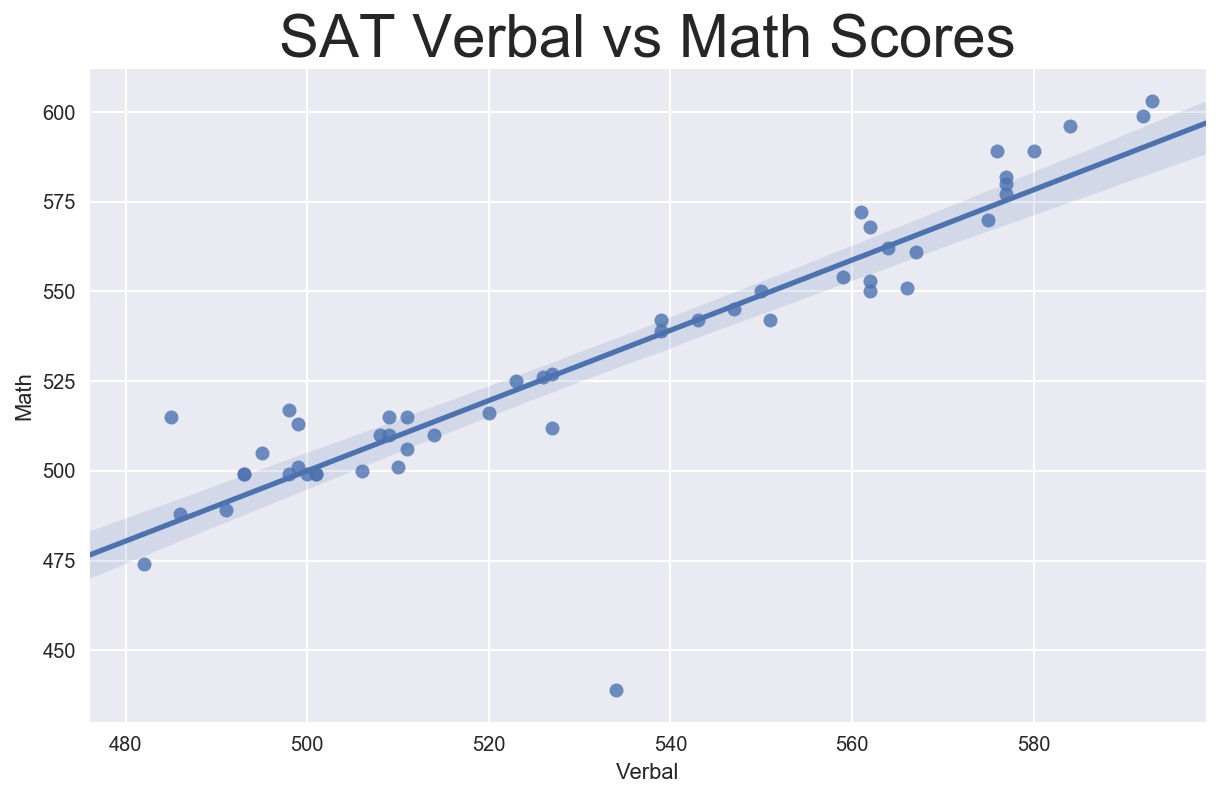

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x="Verbal", y="Math", data=df)
sns.plt.title('SAT Verbal vs Math Scores', fontsize=30)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

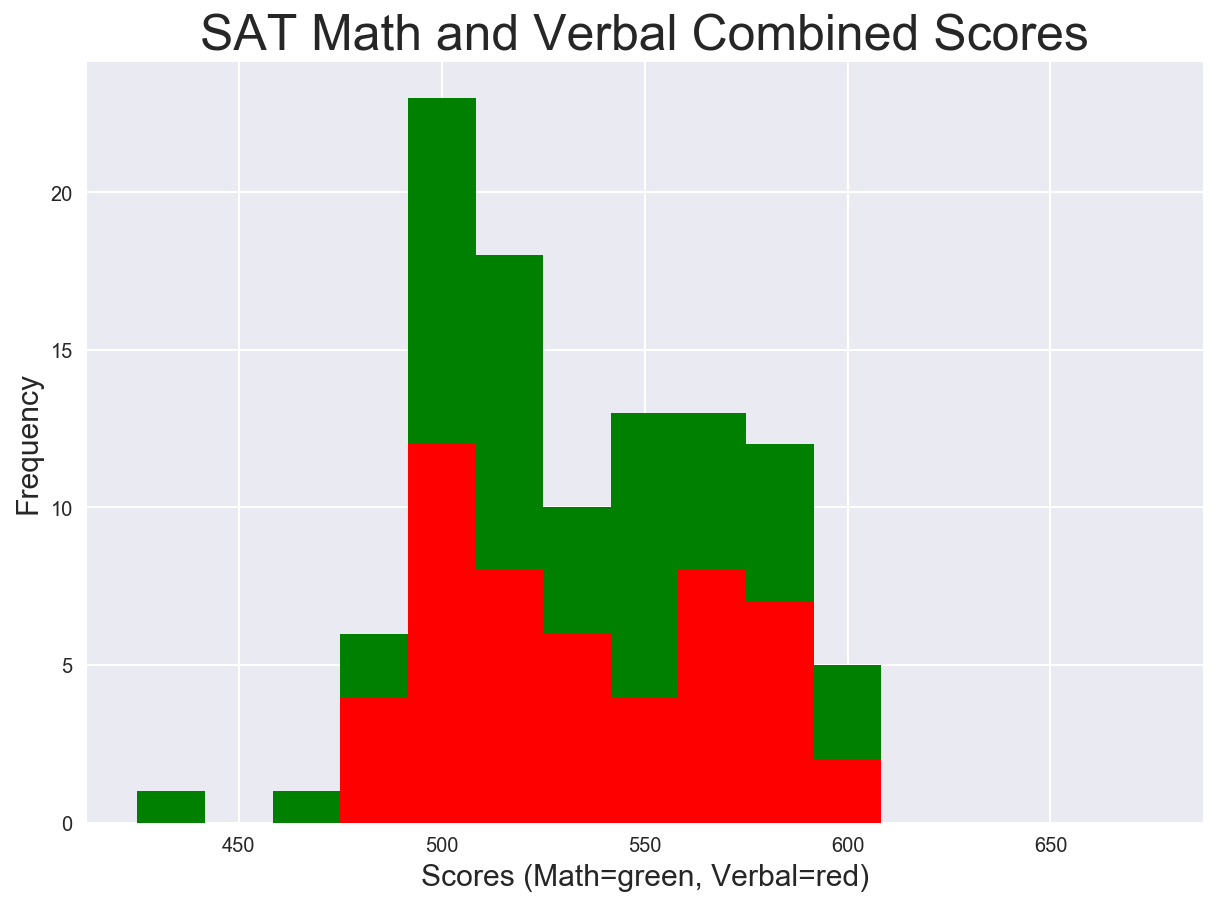

In [21]:
plt.figure(figsize=(10,7));
plt.hist([g_ve,g_ma],
          bins=15, range=(425,675), stacked=True, color = ['r','g'])
plt.xlabel('Scores (Math=green, Verbal=red)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('SAT Math and Verbal Combined Scores',fontsize=25)
plt.show()

In [22]:
df['Combined'] = df['Math'] + df['Verbal']

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


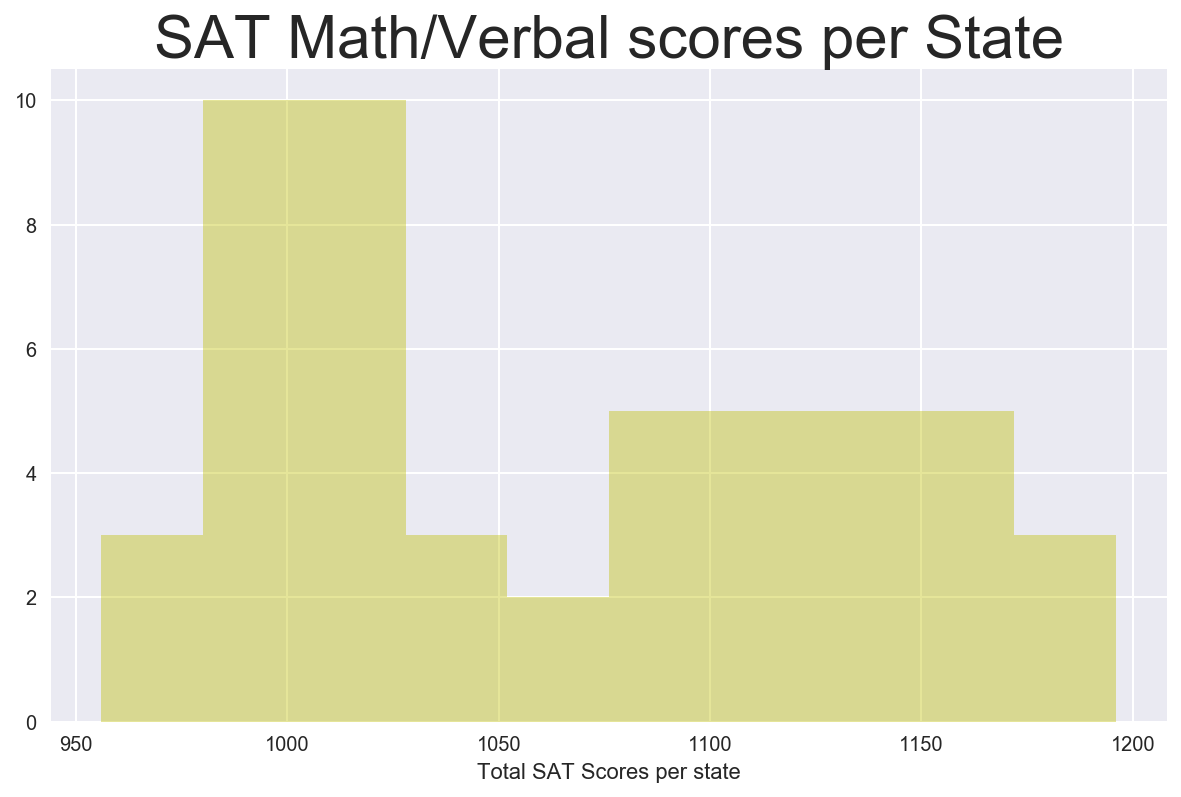

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['Combined'], bins=10, kde=False, color='y',axlabel="Total SAT Scores per state")
sns.plt.title('SAT Math/Verbal scores per State', fontsize=30)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

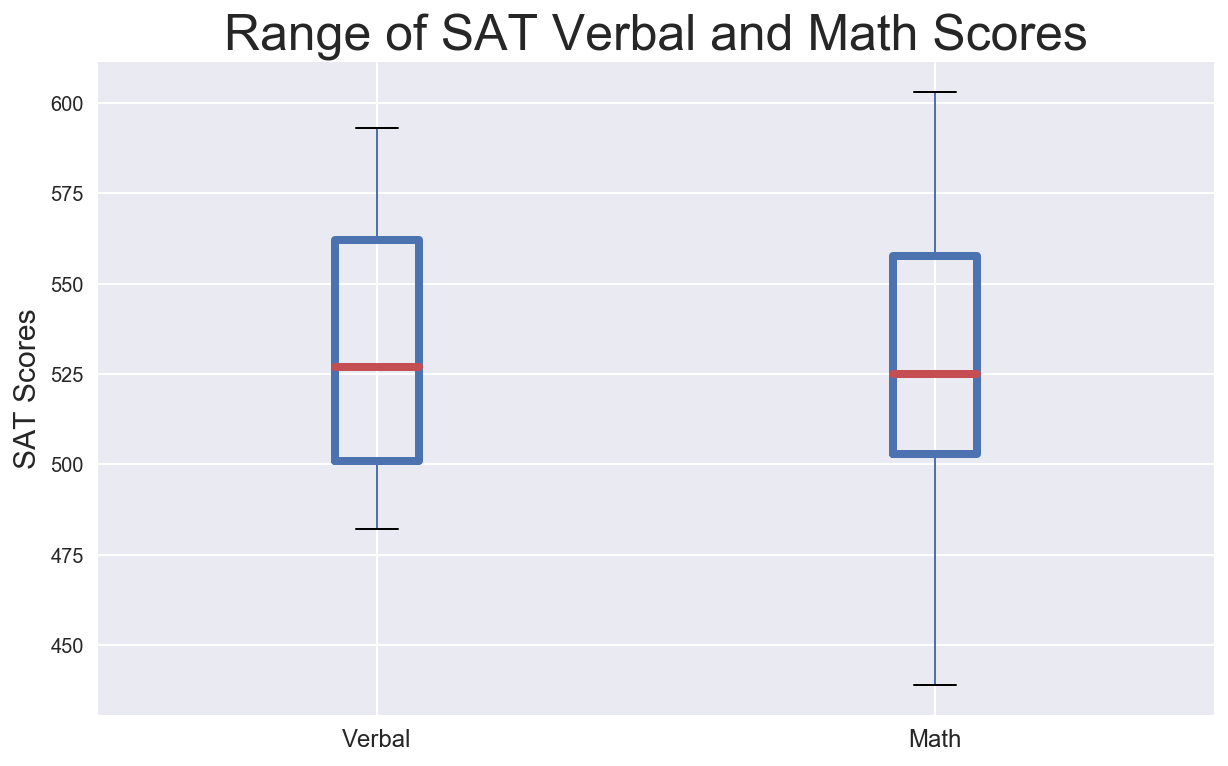

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
df.boxplot(['Verbal', 'Math'],boxprops=boxprops,medianprops=medianprops)
plt.ylabel("SAT Scores",fontsize=15)
plt.title("Range of SAT Verbal and Math Scores",fontsize=25)

p = plt.gca()

plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [25]:
df_vmn=df[g_ve > g_ve.mean()]
print 'The mean state SAT Verbal score for the database is '+str(np.mean(g_ve))+',.'
print 'This database includes '+str(len(df_vmn))+' states whose mean SAT Verbal score exceeded the mean for SAT Verbal scores nationally.'
print "Nearly the same number of states' mean scores fell below and above the mean."
print df_vmn['State'].to_string(index=False)

The mean state SAT Verbal score for the database is 532.529411765,.
This database includes 24 states whose mean SAT Verbal score exceeded the mean for SAT Verbal scores nationally.
Nearly the same number of states' mean scores fell below and above the mean.
CO
OH
MT
ID
TN
NM
IL
KY
WY
MI
MN
KS
AL
NE
OK
MO
LA
WI
AR
UT
IA
SD
ND
MS


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [26]:
df_vmd=df[g_ve > g_ve.median()]
print 'The median state SAT Verbal score for the database is '+str(np.median(g_ve))+',.'
print 'This database includes '+str(len(df_vmd))+' states whose median SAT Verbal score exceeded the median for SAT Verbal scores nationally.'
print 'By definition, the median of a group of 51 data points will be the 26th when listed in order. In this case, two'
print "states, Washington and West Virginia, both had 527 Verbal scores, so only 24 instead of 25 states exceeded the "
print "median. The median score is slightly lower than the mean score, suggesting the data is slightly posivively skewed."
print df_vmd['State'].to_string(index=False)

The median state SAT Verbal score for the database is 527.0,.
This database includes 24 states whose median SAT Verbal score exceeded the median for SAT Verbal scores nationally.
By definition, the median of a group of 51 data points will be the 26th when listed in order. In this case, two
states, Washington and West Virginia, both had 527 Verbal scores, so only 24 instead of 25 states exceeded the 
median. The median score is slightly lower than the mean score, suggesting the data is slightly posivively skewed.
CO
OH
MT
ID
TN
NM
IL
KY
WY
MI
MN
KS
AL
NE
OK
MO
LA
WI
AR
UT
IA
SD
ND
MS


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [27]:
df.head(5)

,State,Rate,Verbal,Math,Combined
0,CT,82,509,510,1019
1,NJ,81,499,513,1012
2,MA,79,511,515,1026
3,NY,77,495,505,1000
4,NH,72,520,516,1036


In [28]:
df['Diff'] = df['Verbal'] - df['Math']

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
df.head(5)

,State,Rate,Verbal,Math,Combined,Diff
0,CT,82,509,510,1019,-1
1,NJ,81,499,513,1012,-14
2,MA,79,511,515,1026,-4
3,NY,77,495,505,1000,-10
4,NH,72,520,516,1036,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [30]:
dfverb = df.sort_values('Diff',ascending=False).head(10)
dfverb.head(5)

,State,Rate,Verbal,Math,Combined,Diff
27,OH,26,534,439,973,95
50,MS,4,566,551,1117,15
29,WV,18,527,512,1039,15
45,AR,6,562,550,1112,12
31,TN,13,562,553,1115,9


In [31]:
dfmath = df.sort_values('Diff',ascending=True).head(10)
dfmath.head(3)

,State,Rate,Verbal,Math,Combined,Diff
21,HI,52,485,515,1000,-30
23,CA,51,498,517,1015,-19
1,NJ,81,499,513,1012,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [32]:
df.corr()

,Rate,Verbal,Math,Combined,Diff
Rate,1.000000,-0.888121,-0.773419,-0.849860,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.972453,0.044527
Math,-0.773419,0.899909,1.000000,0.976768,-0.395574
Combined,-0.849860,0.972453,0.976768,1.000000,-0.189566
Diff,-0.098671,0.044527,-0.395574,-0.189566,1.000000


In [33]:
# A strong positive correlation exists between Verbal and Math scores, with a correlation coefficient of .90.
# A strong negative correlation exists between the Rate of students taking the SAT exam and their scores in both
# categories. My assumption is that in the states where the participation in the SAT exam is low, only those bound for
# college, and likely to perform well on the test, took the test. In states where the vast majority of students took
# the test, the scores were closer to the national average. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [34]:
df.describe()

,Rate,Verbal,Math,Combined,Diff
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,1064.372549,0.686275
std,27.550681,33.360667,36.287393,67.886069,15.839811
min,4.000000,482.000000,439.000000,956.000000,-30.000000
25%,9.000000,501.000000,503.000000,1003.000000,-6.000000
50%,33.000000,527.000000,525.000000,1048.000000,0.000000
75%,64.000000,562.000000,557.500000,1121.500000,4.500000
max,82.000000,593.000000,603.000000,1196.000000,95.000000


In [35]:
# Rate: The rate at which high school graduates took the SAT exam varied widely from state to state. While 82% of high
#   school grads in Connecticut took the test, only 4% in North Dakota, South Dakota, and Mississippi took it. The
#   national mean rate was 37%, with half the states falling in the 9% to 64% range. The mean rate is slightly higher
#   than the median rate, meaning that the data is slightly positively skewed. 
# Verbal: Verbal state averages fell within the range 482 to 593. The mean and median were relatively close at 532 vs
#   527. Again, the data is slightly positively skewed as the mean is slightly above the median. 
# Math: The range is greater on the Math scores, with the range of state averages 439 to 603. Ohio's exceptionally low
#   score of 439 is suspect, and should be checked to verify its accuracy. The mean and median Math scores were nearly
#   equal to the mean and median Verbal scores.
# Difference: Only 3 states had higher than a 15% difference between the two scores. Hawaii's verbal score was thirty
#   points lower than its math score. However, Ohio's math score was 90 points less than its verbal score, according to
#   the database. This seems odd, based on the totality of the similarity of the other state's Verbal and Math scores. 
#   Further investigation is needed to determine if this abnormally low score is valid or a mistake. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [36]:
df2 = pd.read_csv('./drug-use-by-age.csv')
df2.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [37]:
# The drug-use data requires cleaning. Several of the 'frequency' columns appear as objects, suggesting either missing
# values or error values. 

In [38]:
df2['cocaine-frequency'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0', '-'], dtype=object)

In [39]:
# Clean columns with bad data:
df2_mask=df2['cocaine-frequency'] == '-'
df2.loc[df2_mask, 'cocaine-frequency'] = np.nan
df2['cocaine-frequency'] = df2['cocaine-frequency'].map(lambda x: float(x))

df2_mask=df2['crack-frequency'] == '-'
df2.loc[df2_mask, 'crack-frequency'] = np.nan
df2['crack-frequency'] = df2['crack-frequency'].map(lambda x: float(x))

df2_mask=df2['heroin-frequency'] == '-'
df2.loc[df2_mask, 'heroin-frequency'] = np.nan
df2['heroin-frequency'] = df2['heroin-frequency'].map(lambda x: float(x))

df2_mask=df2['inhalant-frequency'] == '-'
df2.loc[df2_mask, 'inhalant-frequency'] = np.nan
df2['inhalant-frequency'] = df2['inhalant-frequency'].map(lambda x: float(x))

df2_mask=df2['oxycontin-frequency'] == '-'
df2.loc[df2_mask, 'oxycontin-frequency'] = np.nan
df2['oxycontin-frequency'] = df2['oxycontin-frequency'].map(lambda x: float(x))

df2_mask=df2['meth-frequency'] == '-'
df2.loc[df2_mask, 'meth-frequency'] = np.nan
df2['meth-frequency'] = df2['meth-frequency'].map(lambda x: float(x))

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [40]:
df2.head(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [41]:
df2g = df2[:]

In [42]:
del df2g['age']

In [43]:
del df2g['n']

In [44]:
df2g

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,35.5,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,NaN,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,2.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


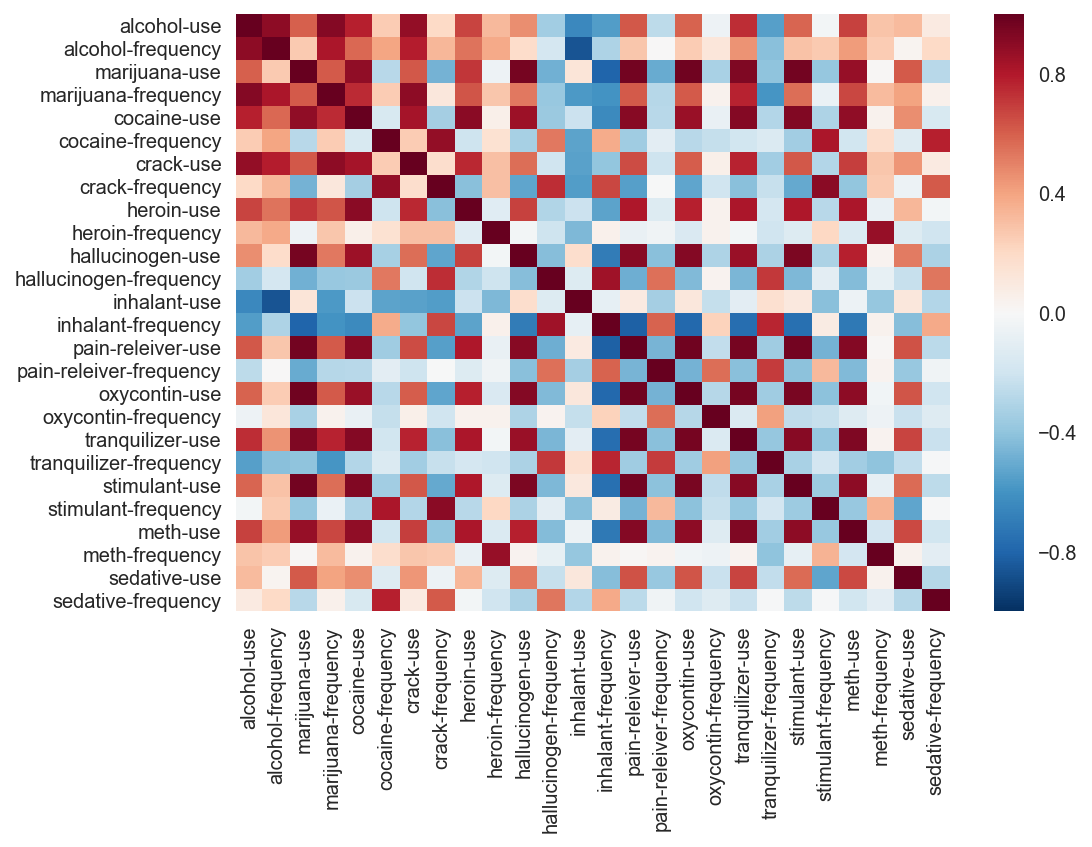

In [45]:
df2gc = df2g.corr()
sns.heatmap(df2gc)

In [46]:
# From the heat map, it seems most drug use occurs across various drug types. Those that show a positive for use of
# one drug are likely to show positives for use of other drugs as well. 

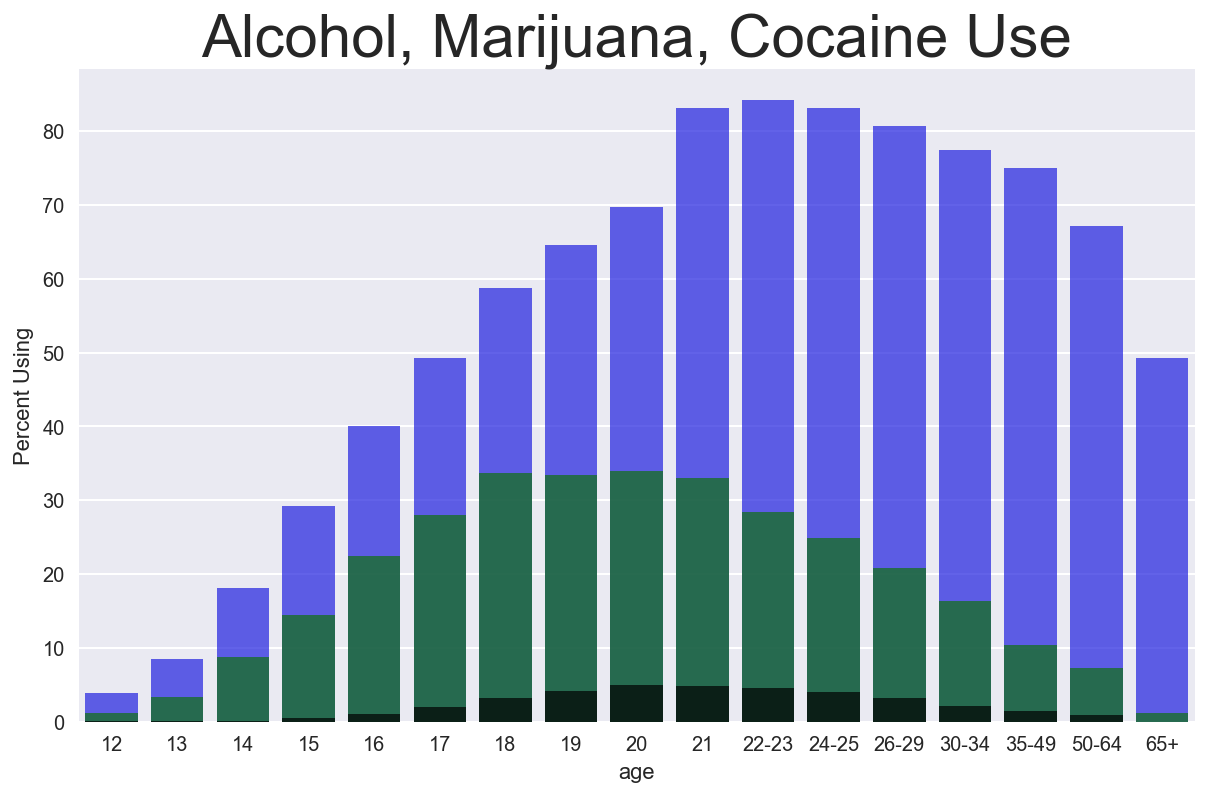

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="age", y="alcohol-use", data=df2,color='blue',alpha=0.7)
ax = sns.barplot(x="age", y="marijuana-use", data=df2,color='green',alpha=0.7)
ax = sns.barplot(x="age", y="cocaine-use", data=df2,color='black',alpha=0.7)
ax.set(ylabel='Percent Using')
sns.plt.title('Alcohol, Marijuana, Cocaine Use', fontsize=30)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [49]:
# After a conversation with another member of the data analyst team, a question over means of Verbal data on the SAT
# test database arose. Our calculated mean of state mean Verbal tests was approximately 532, but the database listed
# a national average as 506. I raised the question of which was more appropriate, and I was asked why I possibly 
# thought 506 was more appropriate? For the purposes of the question, 532 was the likely best answer, but was it a 
# good answer? 

In [50]:
state_pop={'CA':39250,'TX':27862,'FL':20612,'NY':19745,'PA':12802,'IL':12801,'OH':11614,'GA':10310,'NC':10146,'MI':9928,'NJ':8944,'VA':8411,'WA':7288,'AZ':6931,
          'MA':6811,'TN':6651,'IN':6633,'MO':6093,'MD':6016,'WI':5778,'CO':5540,'MN':5519,'SC':4961,'AL':4863,'LA':4681,'KY':4436,'OR':4093,'OK':3923, 'CT':3576,
          'IA':3134,'UT':3051,'MS':2988,'AR':2988,'NV':2940,'KS':2907,'NM':2081,'NE':1907,'WV':1831,'ID':1683,'HI':1428,'NH':1334,'ME':1331,'RI':1056, 'MT':1042,
          'DE':952,'SD':865,'ND':757,'AK':741,'VT':624,'WYO':585,'DC':681}

In [51]:
dfsat = df.copy()
dfsat['Population'] = dfsat.State.map(state_pop)

In [52]:
totalpop = dfsat.Population.sum()

def Pop_pct(Pop):
    state_pct= float(Pop/totalpop)
    return state_pct

dfsat['NationalPct'] = dfsat.Population.apply(Pop_pct)

In [53]:
dfsat.head()

,State,Rate,Verbal,Math,Combined,Diff,Population,NationalPct
0,CT,82,509,510,1019,-1,3576.0,0.011087
1,NJ,81,499,513,1012,-14,8944.0,0.027730
2,MA,79,511,515,1026,-4,6811.0,0.021117
3,NY,77,495,505,1000,-10,19745.0,0.061217
4,NH,72,520,516,1036,4,1334.0,0.004136


In [54]:
dfsat['Weighted_Verbal'] = dfsat['Verbal'].multiply(dfsat['NationalPct'])
print dfsat.Weighted_Verbal.sum()

521.09798505


In [55]:
dfsat.head()

,State,Rate,Verbal,Math,Combined,Diff,Population,NationalPct,Weighted_Verbal
0,CT,82,509,510,1019,-1,3576.0,0.011087,5.643299
1,NJ,81,499,513,1012,-14,8944.0,0.027730,13.837260
2,MA,79,511,515,1026,-4,6811.0,0.021117,10.790698
3,NY,77,495,505,1000,-10,19745.0,0.061217,30.302615
4,NH,72,520,516,1036,4,1334.0,0.004136,2.150686


In [56]:
dfsat['StudentPop'] = dfsat['Population'].multiply(dfsat['Rate']/100)

In [57]:
dfsat.head()

,State,Rate,Verbal,Math,Combined,Diff,Population,NationalPct,Weighted_Verbal,StudentPop
0,CT,82,509,510,1019,-1,3576.0,0.011087,5.643299,2932.32
1,NJ,81,499,513,1012,-14,8944.0,0.027730,13.837260,7244.64
2,MA,79,511,515,1026,-4,6811.0,0.021117,10.790698,5380.69
3,NY,77,495,505,1000,-10,19745.0,0.061217,30.302615,15203.65
4,NH,72,520,516,1036,4,1334.0,0.004136,2.150686,960.48


In [58]:
stupopsum = dfsat.StudentPop.sum()
print stupopsum

143317.8


In [59]:
stupopsum = dfsat.StudentPop.sum()
def Stu_Pop_pct(Pop):
    stu_pct= float(Pop/stupopsum)
    return stu_pct

dfsat['StudentPct'] = dfsat.StudentPop.apply(Stu_Pop_pct)

In [60]:
dfsat.head()

,State,Rate,Verbal,Math,Combined,Diff,Population,NationalPct,Weighted_Verbal,StudentPop,StudentPct
0,CT,82,509,510,1019,-1,3576.0,0.011087,5.643299,2932.32,0.020460
1,NJ,81,499,513,1012,-14,8944.0,0.027730,13.837260,7244.64,0.050549
2,MA,79,511,515,1026,-4,6811.0,0.021117,10.790698,5380.69,0.037544
3,NY,77,495,505,1000,-10,19745.0,0.061217,30.302615,15203.65,0.106083
4,NH,72,520,516,1036,4,1334.0,0.004136,2.150686,960.48,0.006702


In [61]:
dfsat['Weighted_Stu_Ver'] = dfsat['Verbal'].multiply(dfsat['StudentPct'])
print dfsat.Weighted_Stu_Ver.sum()

505.251854759


In [62]:
dfsat.head(51)

,State,Rate,Verbal,Math,Combined,Diff,Population,NationalPct,Weighted_Verbal,StudentPop,StudentPct,Weighted_Stu_Ver
0,CT,82,509,510,1019,-1,3576.0,0.011087,5.643299,2932.32,0.020460,10.414274
1,NJ,81,499,513,1012,-14,8944.0,0.027730,13.837260,7244.64,0.050549,25.224190
2,MA,79,511,515,1026,-4,6811.0,0.021117,10.790698,5380.69,0.037544,19.184865
3,NY,77,495,505,1000,-10,19745.0,0.061217,30.302615,15203.65,0.106083,52.511319
4,NH,72,520,516,1036,4,1334.0,0.004136,2.150686,960.48,0.006702,3.484910
5,RI,71,501,499,1000,2,1056.0,0.003274,1.640285,749.76,0.005231,2.620957
6,PA,71,500,499,999,1,12802.0,0.039691,19.845662,9089.42,0.063421,31.710716
7,VT,69,511,506,1017,5,624.0,0.001935,0.988606,430.56,0.003004,1.535163
8,ME,69,506,500,1006,6,1331.0,0.004127,2.088076,918.39,0.006408,3.242482
9,VA,68,510,501,1011,9,8411.0,0.026077,13.299508,5719.48,0.039908,20.352914


**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.